In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train=pd.read_csv(r'/content/drive/My Drive/Big Mart/train.csv')
test=pd.read_csv(r'/content/drive/My Drive/Big Mart/test.csv')
submission=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier']})
data=train.copy()
final=pd.DataFrame(test['Item_Identifier'])
final['Outlet_Identifier']=test.Outlet_Identifier
data.shape

(8523, 12)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Preprocessing

In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
print (data['Item_Weight'].mean())
print (data['Item_Weight'].median())

12.857645184136183
12.6


In [ ]:
data['Item_Weight'].isnull().groupby(data['Item_Type']).sum() 

Item_Type
Baking Goods             112.0
Breads                    47.0
Breakfast                 21.0
Canned                   110.0
Dairy                    116.0
Frozen Foods             138.0
Fruits and Vegetables    213.0
Hard Drinks               31.0
Health and Hygiene        90.0
Household                151.0
Meat                      88.0
Others                    32.0
Seafood                   13.0
Snack Foods              212.0
Soft Drinks               71.0
Starchy Foods             18.0
Name: Item_Weight, dtype: float64

In [ ]:
data['Item_Weight'].groupby(data['Item_Type']).agg(pd.Series.mean)

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [ ]:
data.Item_Weight=data.Item_Weight.groupby(data['Item_Type']).fillna(data['Item_Weight'].mean())
test.Item_Weight=test.Item_Weight.groupby(test['Item_Type']).fillna(test['Item_Weight'].mean())

In [ ]:
data['Outlet_Size'].isnull().groupby(data['Outlet_Establishment_Year']).sum()

Outlet_Establishment_Year
1985      0.0
1987      0.0
1997      0.0
1998    555.0
1999      0.0
2002    929.0
2004      0.0
2007    926.0
2009      0.0
Name: Outlet_Size, dtype: float64

In [ ]:
data['Outlet_Size'].groupby(data['Outlet_Establishment_Year']).agg(pd.Series.mode)

Outlet_Establishment_Year
1985    Medium
1987      High
1997     Small
1998        []
1999    Medium
2002        []
2004     Small
2007        []
2009    Medium
Name: Outlet_Size, dtype: object

In [ ]:
data['Outlet_Size'].isnull().groupby(data['Outlet_Location_Type']).sum() 

Outlet_Location_Type
Tier 1       0.0
Tier 2    1855.0
Tier 3     555.0
Name: Outlet_Size, dtype: float64

In [ ]:
data['Outlet_Size'].groupby(data['Outlet_Location_Type']).agg(pd.Series.mode)

Outlet_Location_Type
Tier 1     Small
Tier 2     Small
Tier 3    Medium
Name: Outlet_Size, dtype: object

In [ ]:
data['Outlet_Size'].isnull().groupby(data['Outlet_Type']).sum() 

Outlet_Type
Grocery Store         555.0
Supermarket Type1    1855.0
Supermarket Type2       0.0
Supermarket Type3       0.0
Name: Outlet_Size, dtype: float64

In [ ]:
data['Outlet_Size'].groupby(data['Outlet_Type']).agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [ ]:
data.Outlet_Size=data.Outlet_Size.groupby(data['Outlet_Type']).fillna(data['Outlet_Size'].mode()[0])
test.Outlet_Size=data.Outlet_Size.groupby(data['Outlet_Type']).fillna(data['Outlet_Size'].mode()[0])

In [ ]:
data['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
duplicate = data[data.duplicated()] 
duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# EDA

In [ ]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
import numpy as np
data['Item_Fat_Content']=np.where(data['Item_Fat_Content']=='low fat','Low Fat',
                                  np.where(data['Item_Fat_Content']=='LF','Low Fat',
                                           np.where(data['Item_Fat_Content']=='reg','Regular',data['Item_Fat_Content'])))
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

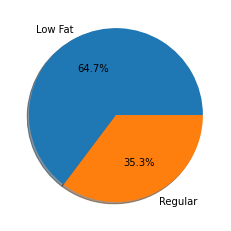

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.pie(data['Item_Fat_Content'].value_counts(),labels=data['Item_Fat_Content'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

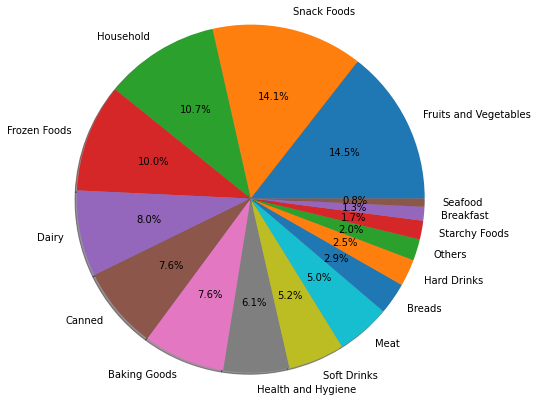

In [ ]:
plt.pie(data['Item_Type'].value_counts(),labels=data['Item_Type'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=2)
plt.show()

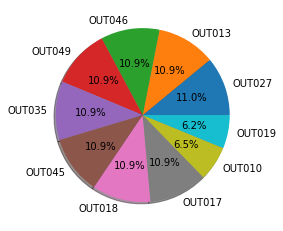

In [ ]:
plt.pie(data['Outlet_Identifier'].value_counts(),labels=data['Outlet_Identifier'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

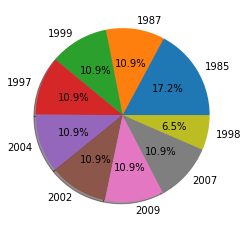

In [ ]:
plt.pie(data['Outlet_Establishment_Year'].value_counts(),labels=data['Outlet_Establishment_Year'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

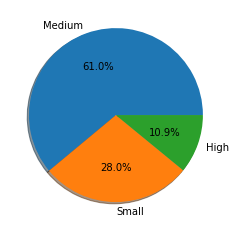

In [ ]:
plt.pie(data['Outlet_Size'].value_counts(),labels=data['Outlet_Size'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

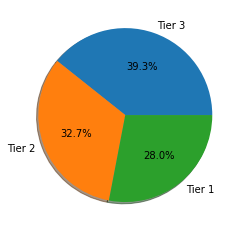

In [ ]:
plt.pie(data['Outlet_Location_Type'].value_counts(),labels=data['Outlet_Location_Type'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

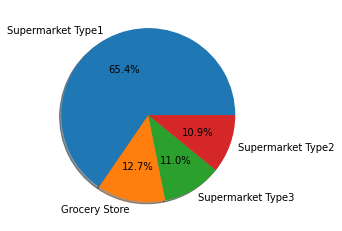

In [ ]:
plt.pie(data['Outlet_Type'].value_counts(),labels=data['Outlet_Type'].value_counts().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

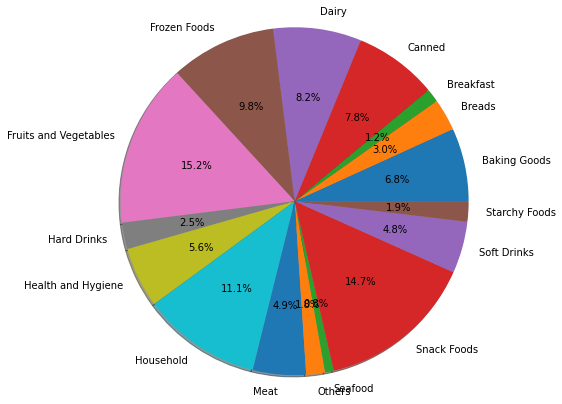

In [ ]:
plt.pie(data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=2)
plt.show()

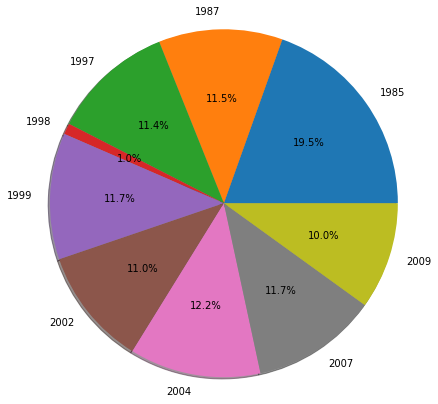

In [ ]:
plt.pie(data.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=2)
plt.show()

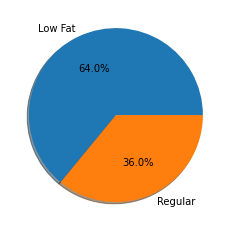

In [ ]:
plt.pie(data.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()

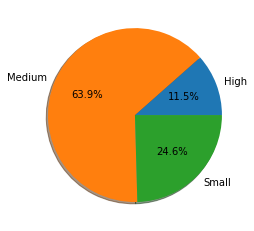

In [ ]:
plt.pie(data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()


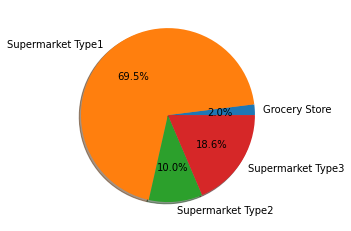

In [ ]:
plt.pie(data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()


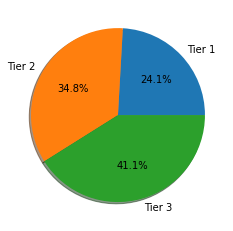

In [ ]:
plt.pie(data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum(),labels=data.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().index,startangle=0,shadow=True,autopct='%1.1f%%',radius=1)
plt.show()


# Feature Engineering

In [ ]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
data[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']].nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
data.groupby(data['Item_Fat_Content'])['Item_Outlet_Sales'].sum()

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Item_Fat_Content_Encoding=data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
Item_Fat_Content_Encoding

Item_Fat_Content
Low Fat    2157.711534
Regular    2224.561170
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data['Item_Fat_Content_Encoding']=data['Item_Fat_Content'].map(Item_Fat_Content_Encoding)
test['Item_Fat_Content_Encoding']=data['Item_Fat_Content'].map(Item_Fat_Content_Encoding)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534


In [ ]:
import numpy as np
data['Outlet_Size_Encoded'] = data.Outlet_Size.map({'Small':1, 'Medium':2,'High':3})
test['Outlet_Size_Encoded'] = data.Outlet_Size.map({'Small':1, 'Medium':2,'High':3})
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding,Outlet_Size_Encoded
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534,2
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534,3


In [ ]:
Visibility_Encoding=data.groupby(['Outlet_Size'])['Item_Visibility'].mean()
Visibility_Encoding

Outlet_Size
High      0.059957
Medium    0.064828
Small     0.071383
Name: Item_Visibility, dtype: float64

In [ ]:
data['Item_Visibility']=np.where(data['Item_Visibility']==0,data['Outlet_Size'].map(Visibility_Encoding),data['Item_Visibility'])
test['Item_Visibility']=np.where(test['Item_Visibility']==0,test['Outlet_Size'].map(Visibility_Encoding),test['Item_Visibility'])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding,Outlet_Size_Encoded
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534,2
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534,2
3,FDX07,19.20,Regular,0.064828,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170,2
4,NCD19,8.93,Low Fat,0.059957,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534,3


In [ ]:
Item_Type_Encoding=data.groupby('Item_Type')['Item_Outlet_Sales'].mean()
Item_Type_Encoding

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Outlet_Identifier_Encoding=data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
Outlet_Identifier_Encoding

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Outlet_Location_Type_Encoding=data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
Outlet_Location_Type_Encoding

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data['Item_Type_Encoding']=data['Item_Type'].map(Item_Type_Encoding)
data['Outlet_Identifier_Encoding']=data['Outlet_Identifier'].map(Outlet_Identifier_Encoding)
data['Outlet_Location_Type_Encoding']=data['Outlet_Location_Type'].map(Outlet_Location_Type_Encoding)
test['Item_Type_Encoding']=test['Item_Type'].map(Item_Type_Encoding)
test['Outlet_Identifier_Encoding']=test['Outlet_Identifier'].map(Outlet_Identifier_Encoding)
test['Outlet_Location_Type_Encoding']=test['Outlet_Location_Type'].map(Outlet_Location_Type_Encoding)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding,Outlet_Size_Encoded,Item_Type_Encoding,Outlet_Identifier_Encoding,Outlet_Location_Type_Encoding
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534,2,2232.542597,2348.354635,1876.909159
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170,2,2006.511735,1995.498739,2279.627651
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534,2,2158.977911,2348.354635,1876.909159
3,FDX07,19.20,Regular,0.064828,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170,2,2289.009592,339.351662,2279.627651
4,NCD19,8.93,Low Fat,0.059957,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534,3,2258.784300,2298.995256,2279.627651


In [ ]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [ ]:
Outlet_Type_Encoding=data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
Outlet_Type_Encoding

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data['Outlet_Type_Encoding']=data['Outlet_Type'].map(Outlet_Type_Encoding)
test['Outlet_Type_Encoding']=data['Outlet_Type'].map(Outlet_Type_Encoding)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding,Outlet_Size_Encoded,Item_Type_Encoding,Outlet_Identifier_Encoding,Outlet_Location_Type_Encoding,Outlet_Type_Encoding
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534,2,2232.542597,2348.354635,1876.909159,2316.181148
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170,2,2006.511735,1995.498739,2279.627651,1995.498739
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534,2,2158.977911,2348.354635,1876.909159,2316.181148
3,FDX07,19.20,Regular,0.064828,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170,2,2289.009592,339.351662,2279.627651,339.828500
4,NCD19,8.93,Low Fat,0.059957,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534,3,2258.784300,2298.995256,2279.627651,2316.181148


In [ ]:
data['Item_Identifier_Type']=data.Item_Identifier.apply(lambda x:x[:2])
test['Item_Identifier_Type']=test.Item_Identifier.apply(lambda x:x[:2])
data.Item_Identifier_Type.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [ ]:
Item_Identifier_Type_Encoding=data.groupby('Item_Identifier_Type')['Item_Outlet_Sales'].mean()
Item_Identifier_Type_Encoding

Item_Identifier_Type
DR    1997.333337
FD    2215.354223
NC    2142.721364
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data['Item_Identifier_Type_Encoding']=data['Item_Identifier_Type'].map(Item_Identifier_Type_Encoding)
test['Item_Identifier_Type_Encoding']=test['Item_Identifier_Type'].map(Item_Identifier_Type_Encoding)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Encoding,Outlet_Size_Encoded,Item_Type_Encoding,Outlet_Identifier_Encoding,Outlet_Location_Type_Encoding,Outlet_Type_Encoding,Item_Identifier_Type,Item_Identifier_Type_Encoding
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2157.711534,2,2232.542597,2348.354635,1876.909159,2316.181148,FD,2215.354223
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2224.561170,2,2006.511735,1995.498739,2279.627651,1995.498739,DR,1997.333337
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2157.711534,2,2158.977911,2348.354635,1876.909159,2316.181148,FD,2215.354223
3,FDX07,19.20,Regular,0.064828,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2224.561170,2,2289.009592,339.351662,2279.627651,339.828500,FD,2215.354223
4,NCD19,8.93,Low Fat,0.059957,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2157.711534,3,2258.784300,2298.995256,2279.627651,2316.181148,NC,2142.721364


In [ ]:
d=data.select_dtypes(exclude=['object'])

In [ ]:
constant_features=[feature for feature in d.columns if d[feature].std()==0]
constant_features

[]

In [ ]:
# Remove all the quasi constant features from train dataset having threshold 0.02(i.e finding all the columns having more than 98% of data as same)
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.02)
sel.fit(d)

VarianceThreshold(threshold=0.02)

In [ ]:
quasi_features=[col for col in d.columns if col not in d.columns[sel.get_support()]]
quasi_features

['Item_Visibility']

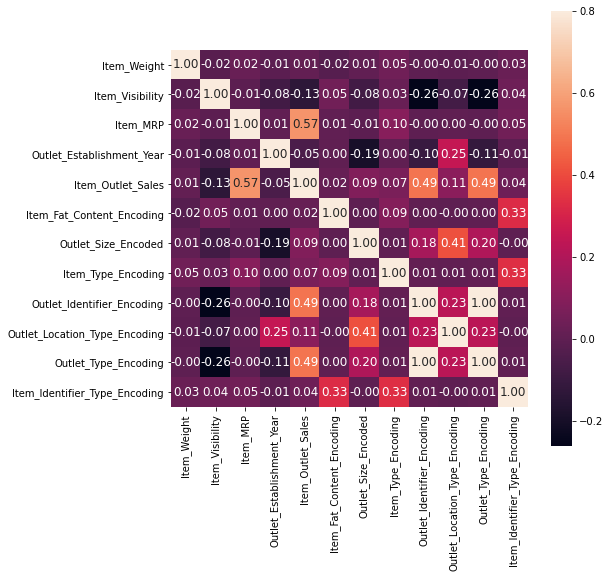

In [ ]:
corrmat=data.corr()
fig1,ax1=plt.subplots(figsize=(8,8))
sns.heatmap(corrmat,vmax=.8, square=True,ax=ax1,annot=True, fmt='.2f', annot_kws={'size': 12})

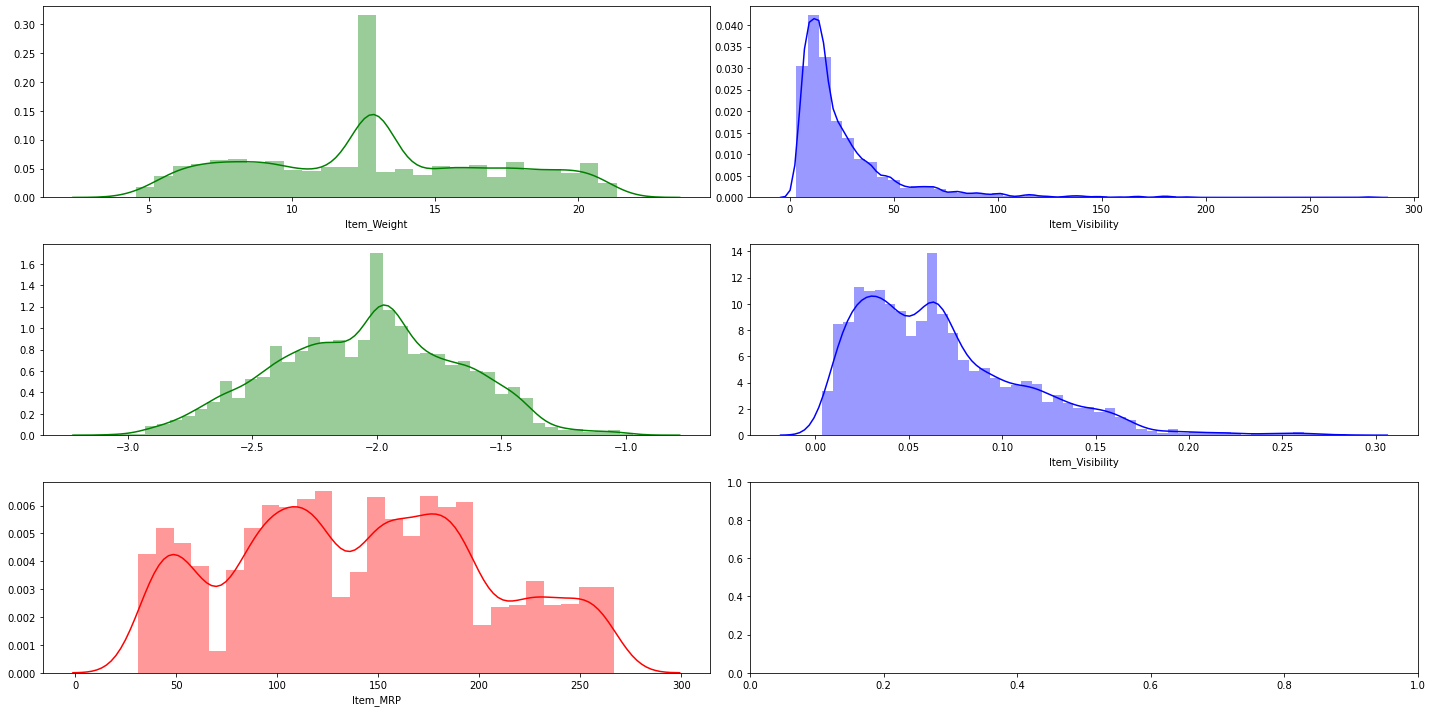

In [ ]:
import scipy.stats as spstats
fig,ax=plt.subplots(3,2,figsize=(20,10))
sns.distplot(data['Item_Weight'],ax=ax[0][0],color='green')
sns.distplot(1/data['Item_Visibility'],ax=ax[0][1],color='b')
Item_Visibility = np.array(data['Item_Visibility'])
l, opt_lambda = spstats.boxcox(Item_Visibility)
sns.distplot(spstats.boxcox(data['Item_Visibility'],lmbda=opt_lambda),ax=ax[1][0],color='green')
sns.distplot(np.log1p(data['Item_Visibility']),ax=ax[1][1],color='b')
sns.distplot(data['Item_MRP'],ax=ax[2][0],color='r')
#sns.distplot(data['Item_Fat_Content_Encoding'],ax=ax[1][1],color='orange')
#ns.distplot(data['Outlet_Size_Encoded'],ax=ax[2][0],color='green')
#sns.distplot(data['Item_Type_Encoding'],ax=ax[2][1],color='green')
#sns.distplot(data['Outlet_Identifier_Encoding'],ax=ax[3][0],color='green')
#sns.distplot(data['Outlet_Location_Type_Encoding'],ax=ax[3][1],color='green')
#sns.distplot(data['Outlet_Type_Encoding'],ax=ax[4][0],color='green')
fig.tight_layout()

# Feature Selection

In [ ]:
# # Build RF classifier to use in feature selection
# from sklearn.ensemble import RandomForestRegressor
# from mlxtend.feature_selection import SequentialFeatureSelector
# clf = RandomForestRegressor(n_estimators=65, n_jobs=-1)

# # Build step forward feature selection
# sfs = SequentialFeatureSelector(clf,
#            k_features=6,
#            forward=True,
#            floating=False,
#            verbose=2,                 
#            cv=5)
# #scoring='r2',
# # Perform SFFS
# sfs= sfs.fit(data[features],data['Item_Outlet_Sales'])

In [ ]:
# selected_features_SFS =data.columns[list(sfs.k_feature_idx_)]
# features=selected_features_SFS
# features

In [ ]:
features=[ 'Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year',
       'Item_Type_Encoding', 'Outlet_Identifier_Encoding',
       'Outlet_Location_Type_Encoding', 'Outlet_Type_Encoding',
       'Item_Fat_Content_Encoding','Item_Identifier_Type_Encoding']

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Encoding',
       'Outlet_Size_Encoded', 'Item_Type_Encoding',
       'Outlet_Identifier_Encoding', 'Outlet_Location_Type_Encoding',
       'Outlet_Type_Encoding', 'Item_Identifier_Type',
       'Item_Identifier_Type_Encoding'],
      dtype='object')

# Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=65,max_depth=6, random_state=0) 
#1155 rmse with n_es=100 and max_depth=6 (all target encoding)
regr.fit(data[features],data['Item_Outlet_Sales'])
print(regr.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=65, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)>


In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators=[60,65,70,80,90,100,150]
max_depth=[4,5,6,7,8,9,10,12]
model=RandomForestRegressor(random_state=0)
hyperparameters=dict(n_estimators=n_estimators,max_depth=max_depth)

search = GridSearchCV(model,hyperparameters, cv=5,verbose=1,n_jobs=-1,scoring="neg_root_mean_squared_error")
search.fit(data[features],data['Item_Outlet_Sales'])
print ("Best n_estimators =",search.best_estimator_.get_params()['n_estimators'])
print ("Best max_depth =",search.best_estimator_.get_params()['max_depth'])


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
r1 = xgb.XGBRegressor(random_state=1,scoring='neg_mean_squared_error')
r2 = RandomForestRegressor(n_estimators=65,max_depth=6, random_state=1)

er = VotingRegressor([('xg', r1), ('rf', r2)])

er.fit(data[features],data['Item_Outlet_Sales'])

sub=er.predict(test[features])
submission=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':sub})
submission.to_csv('rf.csv',index=False)
from google.colab import files
files.download('rf.csv')

[06:27:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import  LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.metrics import mean_squared_error

X_train, X_valid, y_train, y_valid = train_test_split(data[features], data['Item_Outlet_Sales'], test_size = 0.3, random_state =1)

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree', tree.DecisionTreeRegressor()))
models.append(('Gradient Boosting', xgb.XGBRegressor(n_estimators=45)))
models.append(('Random Forest', RandomForestRegressor(n_estimators=65,max_depth=6)))
models.append(('Light GBM', lgb.LGBMRegressor()))
models.append(('Adaboost', AdaBoostRegressor()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Bayesian Ridge', BayesianRidge()))
models.append(('KNN', KNeighborsRegressor()))

model_comp = pd.DataFrame(columns=['Model', 'RMSE'])


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    model_comp = model_comp.append([{'Model': name, 'RMSE': rmse}])

model_comp

In [ ]:
sub=regr.predict(test[features])
submission['Item_Outlet_Sales']=sub
submission.to_csv('rf.csv',index=False)
from google.colab import files
files.download('rf.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>